# 5.1 How to test

*Estimated time for this notebook: 15 minutes*

## Choosing the scenarios to test - "Equivalence partitioning"

Think hard about the different cases the code will run under: this is science, not coding!

We can't write a test for every possible input: this is an infinite amount of work.

We need to write tests to rule out different bugs. There's no need to separately test *equivalent* inputs. 

Let's look at an example of this question outside of coding:

* Research Project : Evolution of agricultural fields in Saskatchewan from aerial photography
* In silico translation  : Compute overlap of two rectangles

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.path import Path

Let's make a little fragment of matplotlib code to visualise a pair of fields.

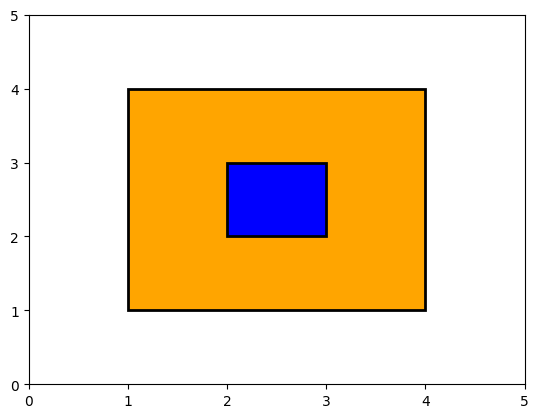

In [2]:
def show_fields(field1, field2):
    def vertices(left, bottom, right, top):
        verts = [
            (left, bottom),
            (left, top),
            (right, top),
            (right, bottom),
            (left, bottom),
        ]
        return verts

    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path1 = Path(vertices(*field1), codes)
    path2 = Path(vertices(*field2), codes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    patch1 = patches.PathPatch(path1, facecolor="orange", lw=2)
    patch2 = patches.PathPatch(path2, facecolor="blue", lw=2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)


show_fields((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 3.0))

Here, we can see that the area of overlap, is the same as the smaller field, with area 1.

We could now go ahead and write a subroutine to calculate that, and also write some test cases for our answer.

But first, let's just consider that question abstractly, what other cases, *not equivalent to this* might there be?

For example, this case, is still just a full overlap, and is sufficiently equivalent that it's not worth another test:

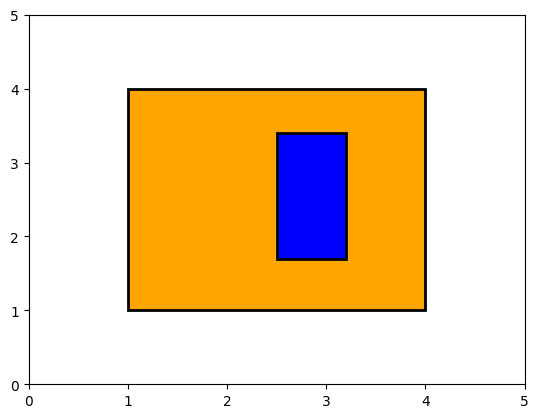

In [3]:
show_fields((1.0, 1.0, 4.0, 4.0), (2.5, 1.7, 3.2, 3.4))

But this case is no longer a full overlap, and should be tested separately:

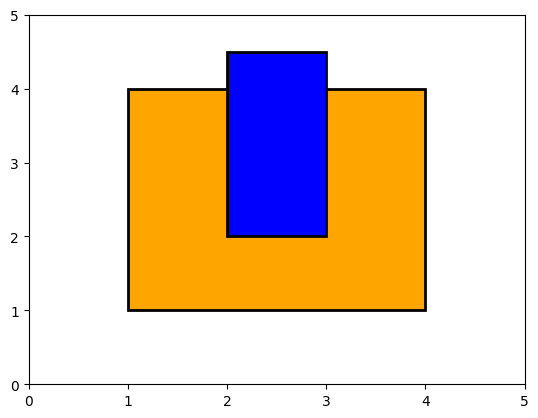

In [4]:
show_fields((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 4.5))

On a piece of paper, sketch now the other cases you think should be treated as non-equivalent. Some answers are below:

In [5]:
for _ in range(50):
    print("Spoiler space")

Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space
Spoiler space


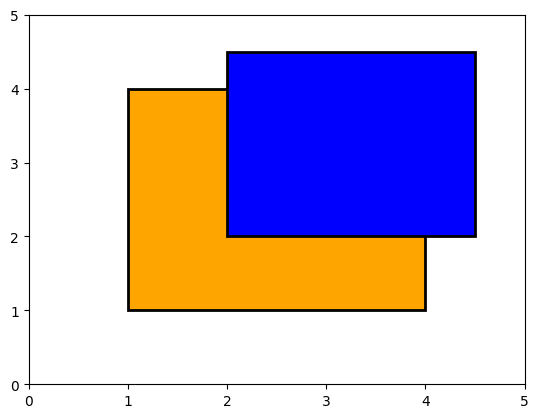

In [6]:
show_fields((1.0, 1.0, 4.0, 4.0), (2, 2, 4.5, 4.5))  # Overlap corner

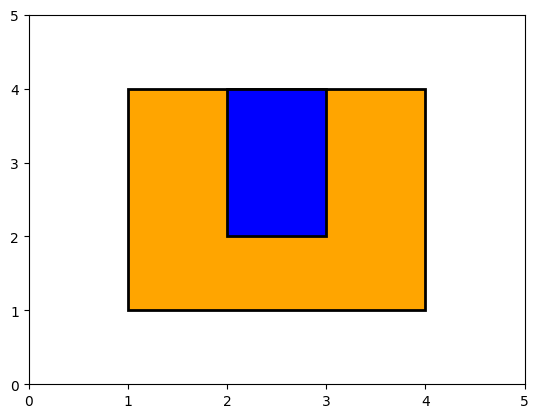

In [7]:
show_fields((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 4.0))  # Just touching

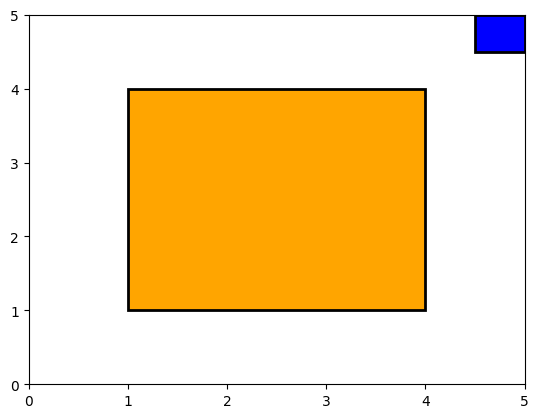

In [8]:
show_fields((1.0, 1.0, 4.0, 4.0), (4.5, 4.5, 5, 5))  # No overlap

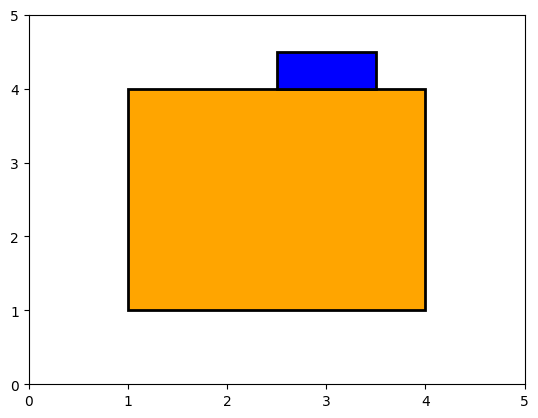

In [9]:
show_fields((1.0, 1.0, 4.0, 4.0), (2.5, 4, 3.5, 4.5))  # Just touching from outside

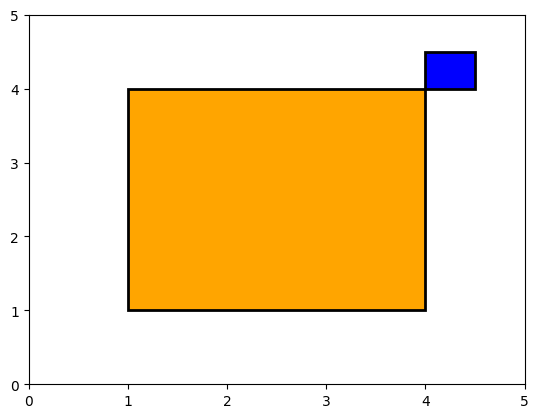

In [10]:
show_fields((1.0, 1.0, 4.0, 4.0), (4, 4, 4.5, 4.5))  # Touching corner

### Using our tests

OK, so how might our tests be useful?

Here's some code that **might** correctly calculate the area of overlap:

In [11]:
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2
    overlap_left = max(left1, left2)
    overlap_bottom = max(bottom1, bottom2)
    overlap_right = min(right1, right2)
    overlap_top = min(top1, top2)
    overlap_height = overlap_top - overlap_bottom
    overlap_width = overlap_right - overlap_left
    return overlap_height * overlap_width

So how do we check our code?

The manual approach would be to look at some cases, and, once, run it and check:

In [12]:
overlap((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 3.0))

1.0

That looks OK.

But we can do better - we don't want to have to manually check our results. We can use the `assert` statement for this:
```
assert <some statement>
```
If `<some statement>` evaluate to `True` carry on. If not, raise an error.

In [13]:
assert overlap((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 3.0)) == 1.0

In [14]:
assert overlap((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 3.0, 4.5)) == 2.0

In [15]:
assert overlap((1.0, 1.0, 4.0, 4.0), (2.0, 2.0, 4.5, 4.5)) == 4.0

In [16]:
assert overlap((1.0, 1.0, 4.0, 4.0), (4.5, 4.5, 5, 5)) == 0.0

AssertionError: 

In [17]:
print(overlap((1.0, 1.0, 4.0, 4.0), (4.5, 4.5, 5, 5)))

0.25


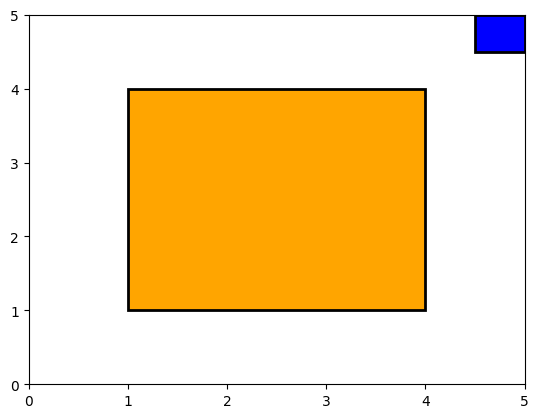

In [18]:
show_fields((1.0, 1.0, 4.0, 4.0), (4.5, 4.5, 5, 5))

What? Why is this wrong?

In our calculation, we are actually getting:

In [19]:
overlap_left = 4.5
overlap_right = 4
overlap_width = -0.5
overlap_height = -0.5

Both width and height are negative, resulting in a positive area.
The above code didn't take into account the non-overlap correctly.

It should be:
    

In [20]:
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2

    overlap_left = max(left1, left2)
    overlap_bottom = max(bottom1, bottom2)
    overlap_right = min(right1, right2)
    overlap_top = min(top1, top2)

    overlap_height = max(0, (overlap_top - overlap_bottom))
    overlap_width = max(0, (overlap_right - overlap_left))

    return overlap_height * overlap_width

In [21]:
assert overlap((1, 1, 4, 4), (2, 2, 3, 3)) == 1.0
assert overlap((1, 1, 4, 4), (2, 2, 3, 4.5)) == 2.0
assert overlap((1, 1, 4, 4), (2, 2, 4.5, 4.5)) == 4.0
assert overlap((1, 1, 4, 4), (4.5, 4.5, 5, 5)) == 0.0
assert overlap((1, 1, 4, 4), (2.5, 4, 3.5, 4.5)) == 0.0
assert overlap((1, 1, 4, 4), (4, 4, 4.5, 4.5)) == 0.0

Note, we reran our other tests, to check our fix didn't break something else. (We call that "fallout")

## Boundary cases

"Boundary cases" are an important area to test:

* Limit between two equivalence classes: edge and corner sharing fields
* Wherever indices appear, check values at ``0``, ``N``, ``N+1``
* Empty arrays:

``` python
    atoms = [read_input_atom(input_atom) for input_atom in input_file]
    energy = force_field(atoms)
```

* What happens if ``atoms`` is an empty list?
* What happens when a matrix/data-frame reaches one row, or one column?

## Positive *and* negative tests

* **Positive tests**: code should give correct answer with various inputs
* **Negative tests**: code should behave appropriately* given invalid inputs, rather than lying

*(It is up to you to decide what is "appropriate" behaviour in your context.)

<div align="left">
Bad input should be expected and should fail early and explicitly.

<div class="fragment roll-in">
Testing should ensure that explicit failures do indeed happen.

## Raising exceptions

In Python, we can signal an error state by raising an error:

In [22]:
def I_only_accept_positive_numbers(number):
    # Check input
    if number < 0:
        raise ValueError("Input " + str(number) + " is negative")

    # Do something

In [23]:
I_only_accept_positive_numbers(5)

In [24]:
I_only_accept_positive_numbers(-5)

ValueError: Input -5 is negative

There are standard "Exception" types, like `ValueError` we can `raise` (more on this in Module 08.03)

We would like to be able to write tests like this:

```python
assert I_only_accept_positive_numbers(-5) == # Gives a value error
```

But to do that, we need to learn about more sophisticated testing tools, called "test frameworks".

## A note on Test-Driven Development (TDD)

In the overlapping fields example above we planned some of our test scenarios _before_ writing the `overlap` function. This is an example of "Test-Driven Development (TDD)". This was a particularly fashionable approach to development a few years ago. Some TDD advocates have taken an uncompromising approach which has led to it slightly falling out of favour more recently. However, it is worth retaining the benefits that caused its initial popularity.

In its "purest"/uncompromising form:

* Always write and commit your tests _before_ the related production code.
* Always write tests to cover every line of your production code (we'll cover how to measure this in the next module).

A more pragmatic interpretation might be:

* Write your tests simultaneously with your production code.
* Allow your tests to affect the design of your production code - i.e. ensure that your production code is _testable_.
* When you are stuck, break down the problem into smaller, testable stages.
* Ensure that your tests cover (i) the core function of the software and (ii) any input sanity checking.

